### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [6]:
import pandas as pd
data = pd.read_csv('3_10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [2]:
import numpy as np
def generate_degrees(data:list,degree:int):
    return np.array([data ** n for n in range(1,degree+1)]).T

In [11]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
def train_poly(degree, data):
    X = generate_degrees(data['x_train'],degree)
    model = LinearRegression().fit(X,data['y_train'])
    y_pred = model.predict(X)
    error = r2_score(data['y_train'],y_pred)
    print("Степень полинома %d r2_score = %s \n" % (degree,error))
    return (degree,error)


In [15]:
errors = []
for degree in range(1,11):
    errors.append(train_poly(degree,data))


Степень полинома 1 r2_score = 0.5194693682784115 

Степень полинома 2 r2_score = 0.5334743428787219 

Степень полинома 3 r2_score = 0.8884043369162165 

Степень полинома 4 r2_score = 0.8954938957170192 

Степень полинома 5 r2_score = 0.8955568441439694 

Степень полинома 6 r2_score = 0.8993403708180603 

Степень полинома 7 r2_score = 0.9004609754024426 

Степень полинома 8 r2_score = 0.9086556247247776 

Степень полинома 9 r2_score = 0.9088071215144211 

Степень полинома 10 r2_score = 0.909113383129074 



In [18]:
errors

[(1, 0.5194693682784115),
 (2, 0.5334743428787219),
 (3, 0.8884043369162165),
 (4, 0.8954938957170192),
 (5, 0.8955568441439694),
 (6, 0.8993403708180603),
 (7, 0.9004609754024426),
 (8, 0.9086556247247776),
 (9, 0.9088071215144211),
 (10, 0.909113383129074)]

In [19]:
max_errors = max(errors,key = lambda x: x[1])
max_errors

(10, 0.909113383129074)

In [ ]:
def best_poly(n,data):

    def train_poly(degree:int, data):
        X = generate_degrees(data['x_train'],degree)
        model = LinearRegression().fit(X,data['y_train'])
        y_pred = model.predict(X)
        error = r2_score(data['y_train'],y_pred)
        #print("Степень полинома %d r2_score = %s \n" % (degree,error))
        return (degree,error)
    
    errors = []
    for degree in range(1,n+1):
        errors.append(train_poly(degree,data))
    max_errors = max(errors,key = lambda x: x[1])
    print(f"Наилучшие показатели для предоставленных данных: Степень полинома {max_errors[0]}, r2_score = {max_errors[1]}\n")
    print('Обучим ее на выявленынх показателях')
    


In [33]:
best_poly(10,data)

Наилучшие показатели для предоставленных данных: Степень полинома 10, r2_score = 0.909113383129074


In [35]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель
    
    дополнительно рисуем график
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = mean_squared_error(data['y_train'], y_pred)
    print("Степень полинома %d Ошибка %.3f" % (degree, error))

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)

Степень полинома 5 Ошибка 0.067


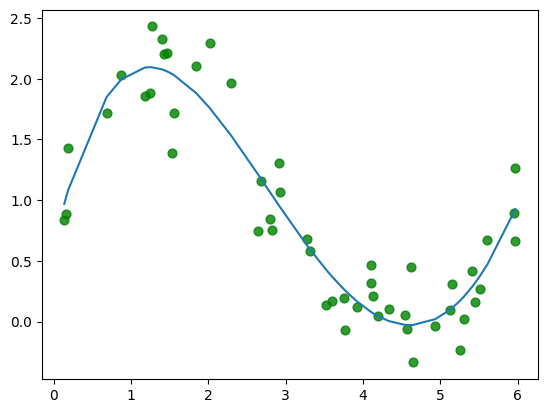

In [40]:
train_polynomial(5,data)